# Greeks

In [1]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import ivolat3

In [2]:
s_df = pd.read_pickle('./data/s.pickle')
op_pn = pd.read_pickle('./data/op1.pickle')

In [3]:
t0 = pd.to_datetime('2018-02-26 15:15')
t1 = pd.to_datetime('2018-03-09 09:00')
s0 = s_df.loc[t0, '1803']
r = 0.001
delta_t = t1 - t0
t = (delta_t.days / 365) + (delta_t.seconds / 31536000)
op_df = op_pn.loc['2018-02-26 15:15'].dropna().reset_index().copy()

## インプライド・ボラティリティ

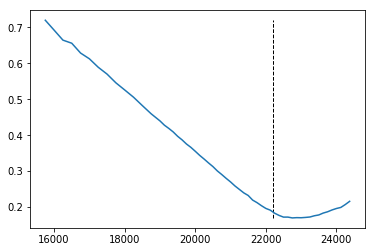

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(op_df['k'], op_df['iv'])
ax.vlines(s0, op_df['iv'].min(), op_df['iv'].max(), linestyle='--', linewidth=1)
plt.show()

## デルタ

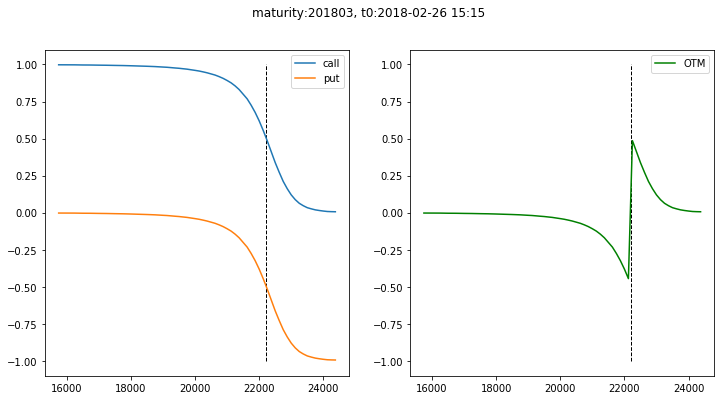

In [5]:
delta_call = op_df.apply(lambda x: ivolat3.delta(
    s0, x['k'], r, 0, t, x['iv'], 'C'), axis=1)
delta_put = op_df.apply(lambda x: ivolat3.delta(
    s0, x['k'], r, 0, t, x['iv'], 'P'), axis=1)
delta = op_df.apply(lambda x: ivolat3.delta(
    s0, x['k'], r, 0, t, x['iv'], x['Call/Put']), axis=1)

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot(op_df['k'], delta_call, label='call')
ax1.plot(op_df['k'], delta_put, label='put')
ax2.plot(op_df['k'], delta, color='green', label='OTM')
ax1.vlines(s0, ymin=-1, ymax=1, linestyle='--', linewidth=1)
ax2.vlines(s0, ymin=-1, ymax=1, linestyle='--', linewidth=1)
ax1.legend()
ax2.legend()

plt.suptitle('maturity:201803, t0:2018-02-26 15:15')
plt.show()

## ガンマ

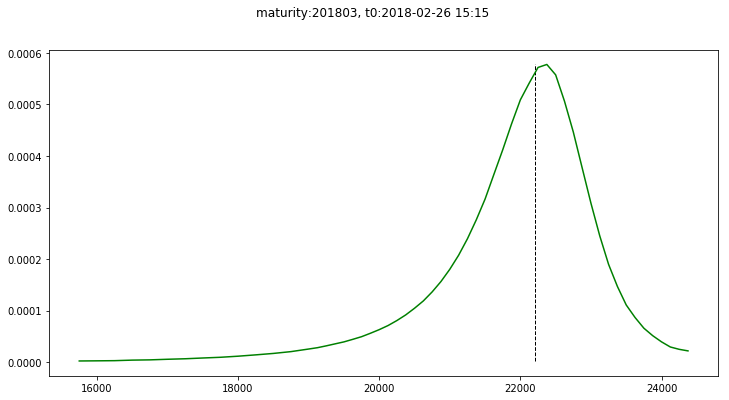

In [6]:
gamma = op_df.apply(lambda x: ivolat3.gamma(
    s0, x['k'], r, 0, t, x['iv']), axis=1)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(op_df['k'], gamma, color='green', label='OTM')
ax.vlines(s0, ymin=gamma.min(), ymax=gamma.max(), linestyle='--', linewidth=1)
ax1.legend()
ax2.legend()

plt.suptitle('maturity:201803, t0:2018-02-26 15:15')
plt.show()

## ベガ

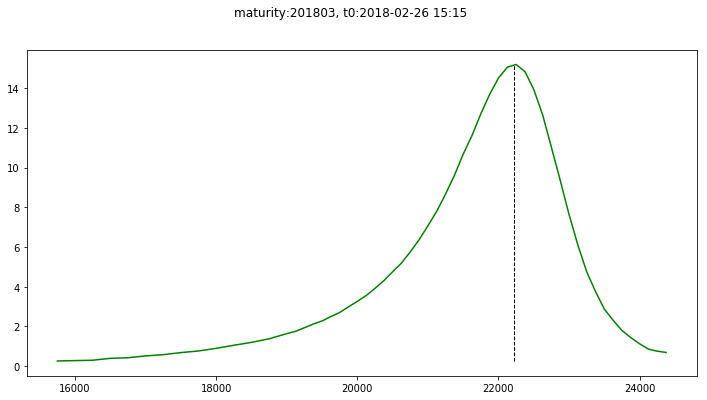

In [7]:
vega = op_df.apply(lambda x: ivolat3.vega(
    s0, x['k'], r, 0, t, x['iv']), axis=1) * 0.01

fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(1, 1, 1)
ax.plot(op_df['k'], vega, color='green', label='OTM')
ax.vlines(s0, ymin=vega.min(), ymax=vega.max(), linestyle='--', linewidth=1)
ax1.legend()
ax2.legend()

plt.suptitle('maturity:201803, t0:2018-02-26 15:15')
plt.show()

## セータ

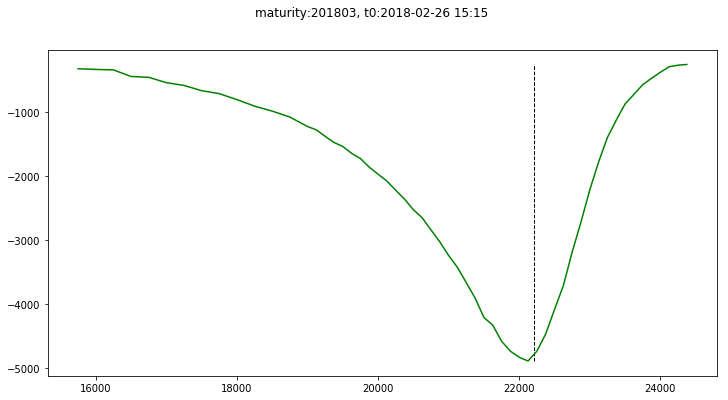

In [8]:
theta = op_df.apply(lambda x: ivolat3.theta(
    s0, x['k'], r, 0, t, x['iv'], x['Call/Put']), axis=1)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(op_df['k'], theta, color='green', label='OTM')
ax.vlines(s0, ymin=theta.min(), ymax=theta.max(), linestyle='--', linewidth=1)
ax1.legend()
ax2.legend()

plt.suptitle('maturity:201803, t0:2018-02-26 15:15')
plt.show()

## 演習:損益を算出してみよう

---
-|2/26 15:15|2/27 15:15
---|---|---
先物|22214|22375
ボラティリティ|17.04|17.66
コールプレミアム|38|59.6

Greeks|Value
---|---
デルタ|0.12
ガンマ|0.0003
ベガ|7.6
セータ|-2213

In [9]:
s0, s1 = 22214, 22375
sigma0, sigma1 = 17.04, 17.66
c0, c1 = 38, 59.6
delta = 0.12
gamma = 0.0003
vega = 7.6
theta = -2213

### デルタの損益

In [10]:
pl_delta = (s1 - s0) * delta
print(pl_delta)

19.32


### ガンマの損益

In [11]:
pl_gamma = (s1 - s0) ** 2 * 0.5 * gamma
print(pl_gamma)

3.8881499999999996


### ベガの損益

In [12]:
pl_vega = (sigma1 - sigma0) * vega
print(pl_vega)

4.712000000000008


### セータの損益

In [13]:
pl_theta = 1 / 365 * theta
print(pl_theta)

-6.063013698630137


### デルタ/ガンマ/ベガ/セータの損益

In [14]:
pl_total = sum((pl_delta, pl_gamma, pl_vega, pl_theta))
print(pl_total)

21.85713630136987


### 実際の損益

In [15]:
c1 - c0

21.6